In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import pandas as pd
import gaussianfunctions as gauss

### With BIC, 2 components

In [15]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    t=gauss.findThreshold1(X,n_components,em)
    return(em,t)

def EMGMM2(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    t=gauss.findThreshold2(X,n_components,em)
    return(em,t)

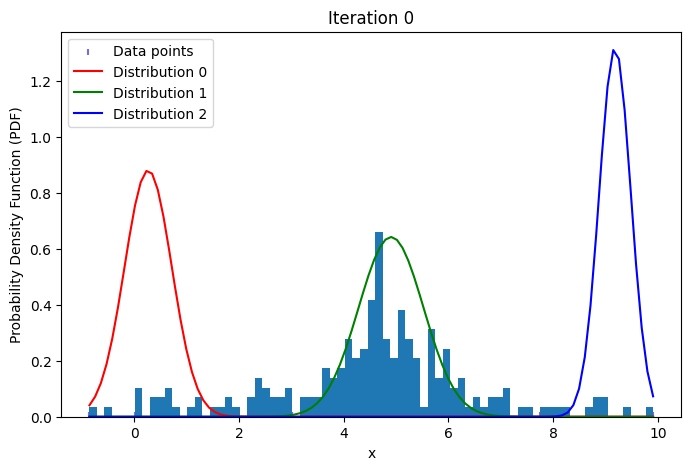

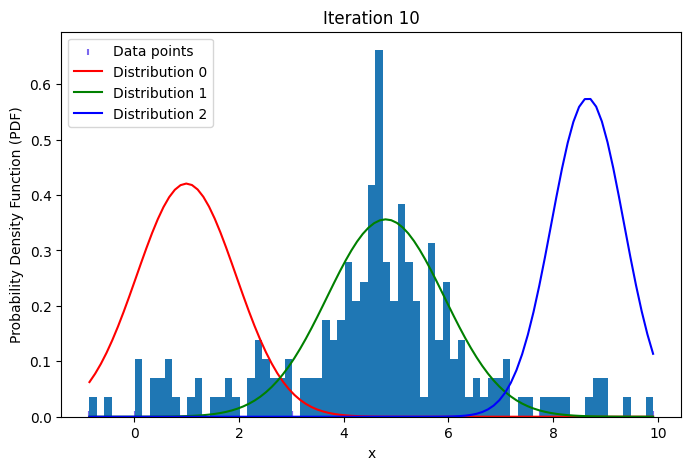

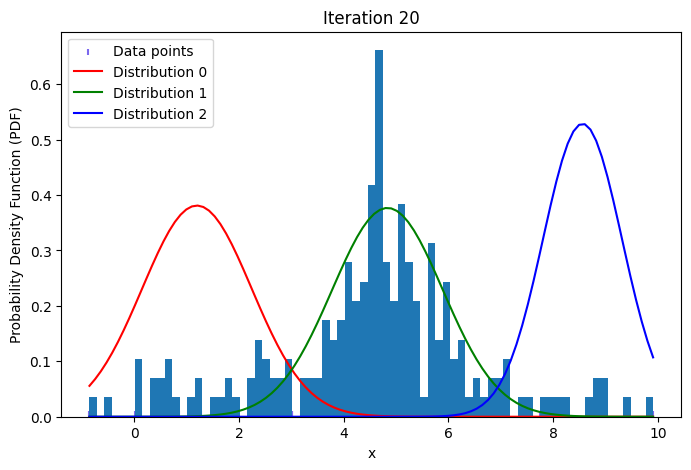

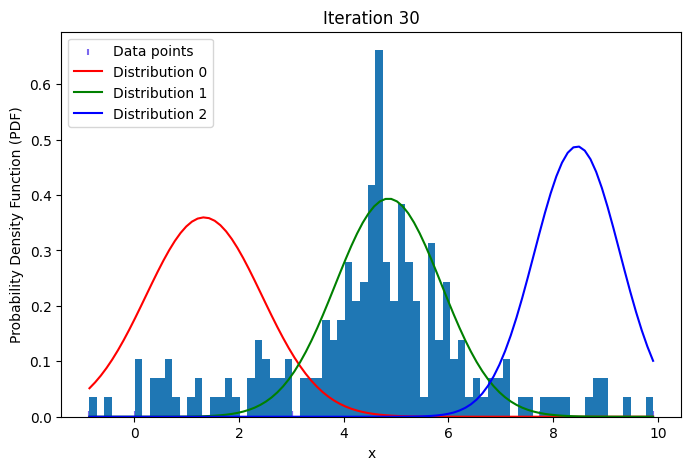

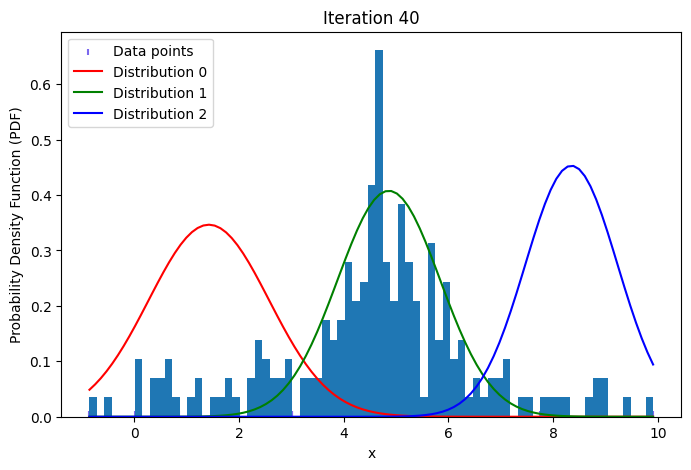

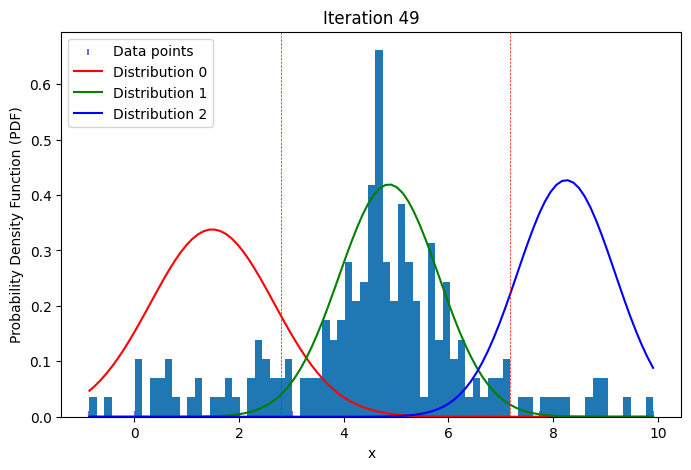

In [8]:
X1=np.random.normal(5,np.sqrt(0.5),100)
X2=np.random.normal(4,np.sqrt(7),100)
X=np.array(list(X1)+list(X2))

em,t=EMGMM(X,[])

gauss.PlotGMM(X,em,10,t,[])

### With BIC, 3 components

In [32]:
X1=np.random.normal(5,np.sqrt(0.01),100)
X2=np.random.normal(2.5,np.sqrt(0.2),50)
X3=np.random.normal(0,np.sqrt(2),25)
X=np.array(list(X1)+list(X2)+list(X3))

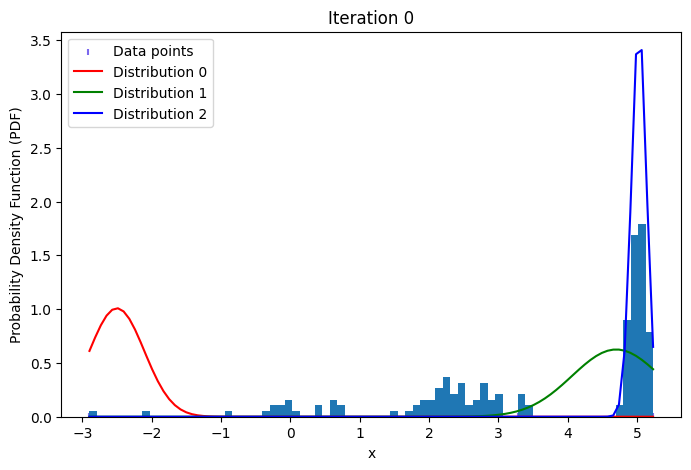

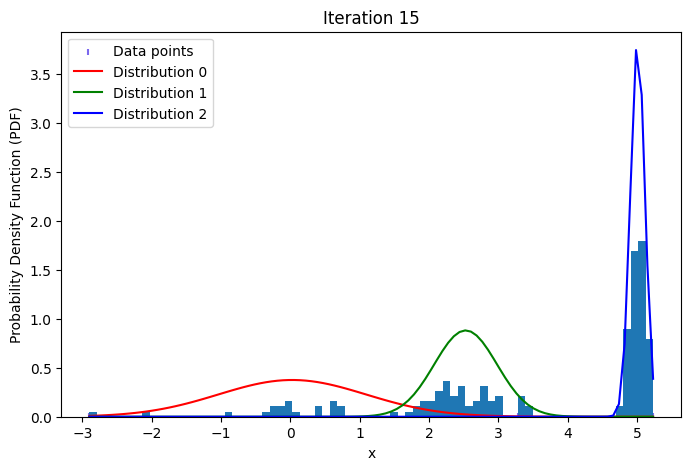

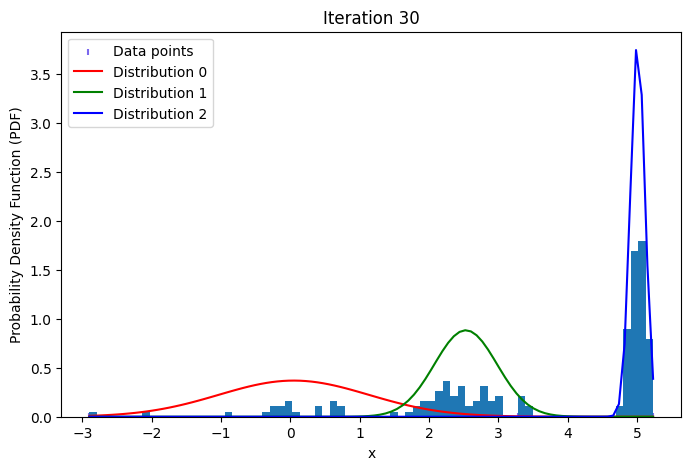

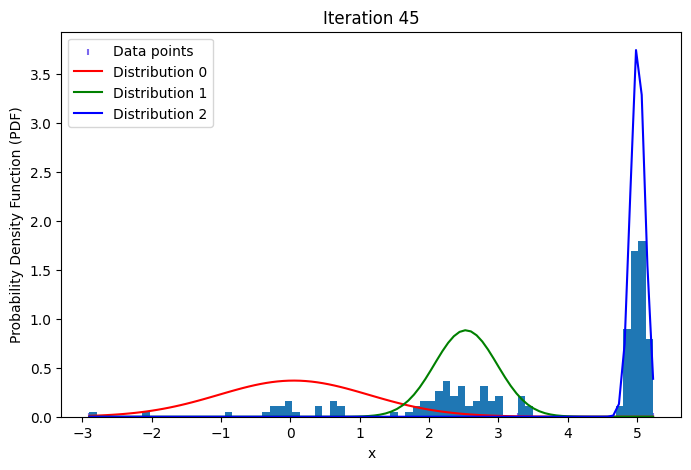

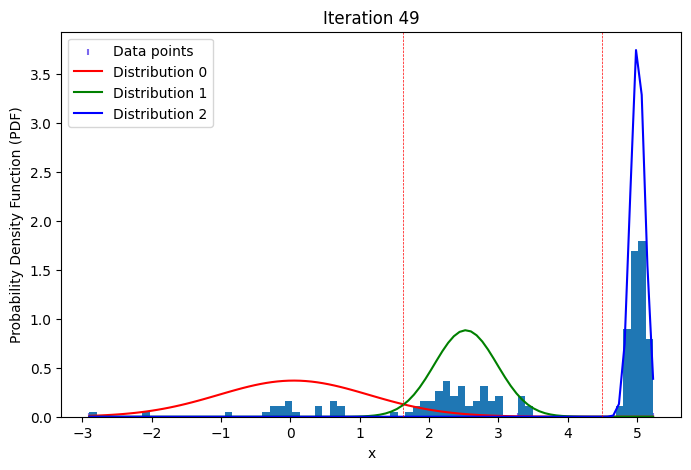

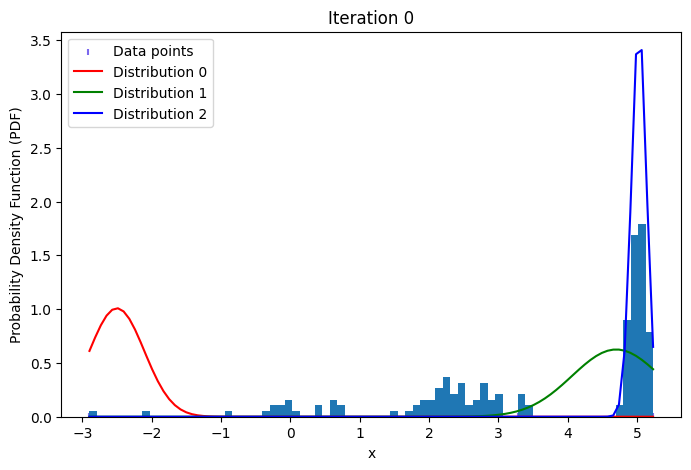

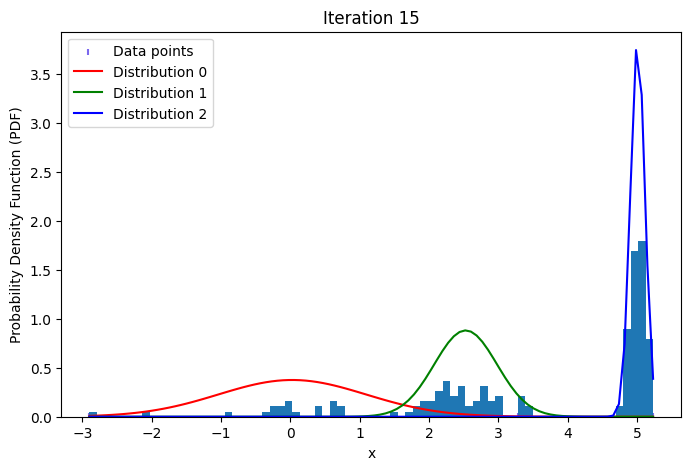

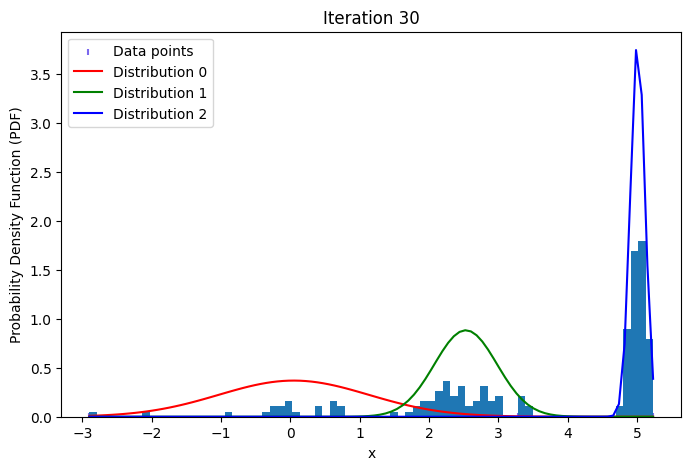

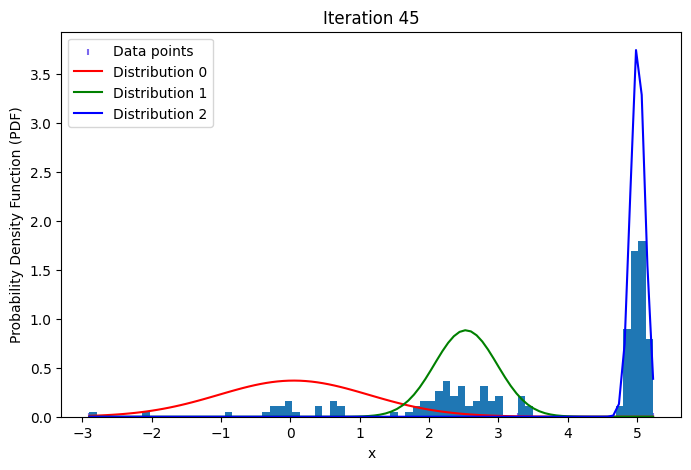

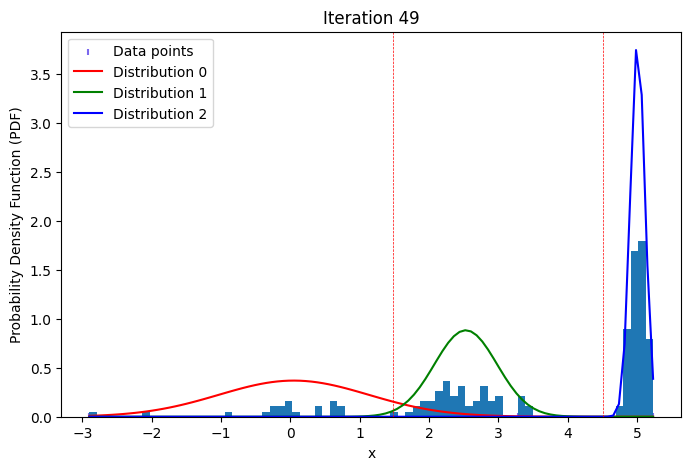

In [33]:

# gauss.PlotTrue(X,[5,2.5,0],[0.2,0.2,0.1])
em,t=EMGMM(X,[])
gauss.PlotGMM(X,em,15,t,[])
em2,t2=EMGMM2(X,[])
gauss.PlotGMM(X,em2,15,t2,[])

In [27]:
print(t,t2)

[1.4499711523535495, 4.5375368442283275] [1.3885137057553492, 4.532319808369524]


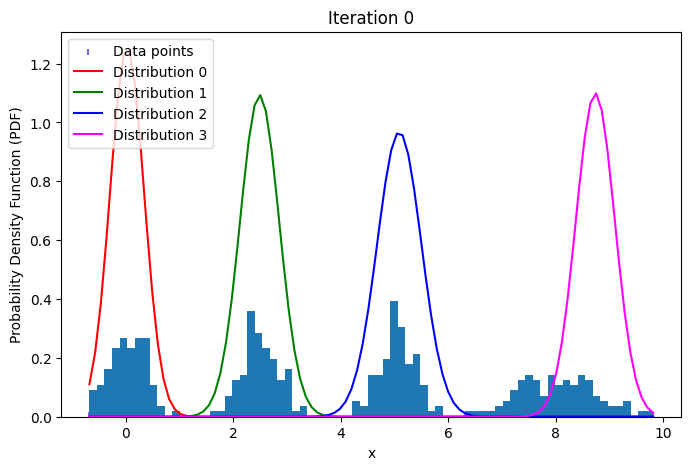

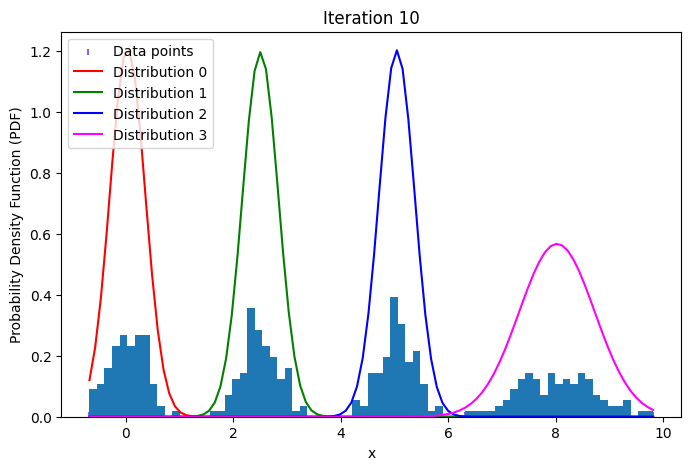

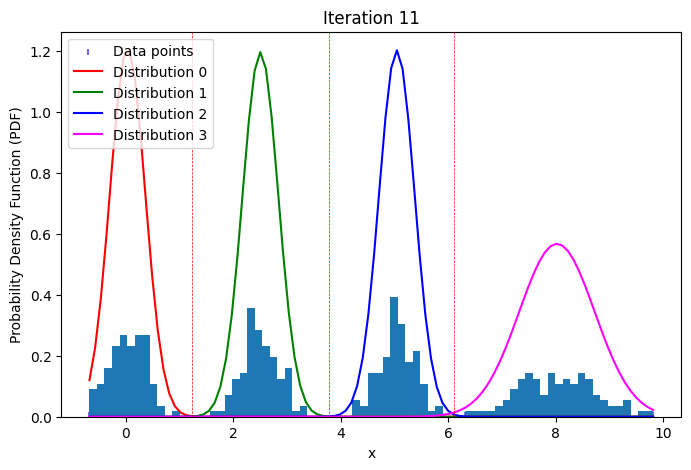

In [14]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

em=gauss.GaussianEM(D,4,[])
t=gauss.findThreshold(D,4,em)
gauss.PlotGMM(D,em,10,t,[])

### Use sklearn.mixture.GaussianMixture

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

def fitGaussEM(X):

    X=X.reshape(-1,1)
    gm=GaussianMixture().fit(X)
    N = np.arange(1, 11)
    models = [None for i in range(len(N))]

    for i in range(len(N)):
        models[i] = GaussianMixture(N[i]).fit(X)

    # compute the AIC and the BIC
    AIC = [m.aic(X) for m in models]
    BIC = [m.bic(X) for m in models]

    plt.figure(figsize=(8,5))
    M_best_BIC=models[np.argmin(BIC)]
    M_best_AIC=models[np.argmin(AIC)]

    b=np.linspace(np.min(X),np.max(X),100)

    log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
    log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

    resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
    resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

    pdf1=np.exp(log_prob1)
    pdf2=np.exp(log_prob2)


    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()



In [ ]:
def fitBayesianGauss(X,) :
    
    X=X.reshape(-1,1)
    gm=BayesianGaussianMixture().fit(X)
    
    bay_gmm_weights = gm.weights_
    np.round(bay_gmm_weights, 2)
    n_clusters_ = (np.round(bay_gmm_weights, 2) > 0).sum()
    print('Estimated number of clusters: ' + str(n_clusters_))



    # plt.plot(b,pdf1)
    plt.plot(b,pdf2)
    plt.hist(X,bins=75, density=True)

    plt.xlabel("$x$")
    plt.ylabel("Pdf")

    plt.show()


### Initial parameters

In [95]:
array=np.arange(10)
def get_spaced_elm(X, n_components):
    spaced_elm = X[np.round(np.linspace(0, len(X)-1, n_components)).astype(int)]
    spaced_elm= spaced_elm[0]+1e-6
    return spaced_elm
get_spaced_elm(array,3)

array([0, 4, 9])

In [86]:
def get_mid_spaced(array,n_elements):
    spaced_elm = array[np.round(np.linspace(0, len(array)-1, n_elements)).astype(int)]
    mid_spaced_elm=[]
    for i in range (n_elements-2):
        mid_spaced_elm.append(spaced_elm[i+1])
        
    return(mid_spaced_elm)

In [93]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))
mid=get_mid_spaced(np.sort(D),4)

init_means=get_spaced_elm(np.sort(D),4)

[-0.94579928  2.36010223  5.15530995  9.82017579] -0.9457992754052875 9.820175785578638


# Thresholding

In [31]:
X1=np.random.normal(5,np.sqrt(0.5),100)
X2=np.random.normal(2.5,np.sqrt(0.2),100)
X=np.array(list(X1)+list(X2))
em=gauss.GaussianEM(X,2,[])
em[-1]

[{'Mean': 2.535583600119782,
  'Variance': 0.22604002285422323,
  'Weight': 0.507069371335303},
 {'Mean': 5.029685269032388,
  'Variance': 0.559660416194858,
  'Weight': 0.49293753987762956}]

In [43]:
em[-1][1]

{'Mean': 5.029685269032388,
 'Variance': 0.559660416194858,
 'Weight': 0.49293753987762956}

In [46]:
a=0.559660416194858-0.22604002285422323
b=2*((0.22604002285422323*5.029685269032388)-(0.559660416194858*2.535583600119782))
c=(0.559660416194858*(2.535583600119782**2))-(0.22604002285422323*(5.029685269032388**2))-(2*0.22604002285422323*0.559660416194858*np.log((0.507069371335303*np.sqrt(0.559660416194858))/(0.49293753987762956*np.sqrt(0.22604002285422323))))

d=(b**2)-(4*a*c)
thres1= (-b-np.sqrt(d))/(2*a)
thres2= (-b+np.sqrt(d))/(2*a)
print(a,b,c)

0.33362039334063476 -0.5643111995565251 -2.241984219829201


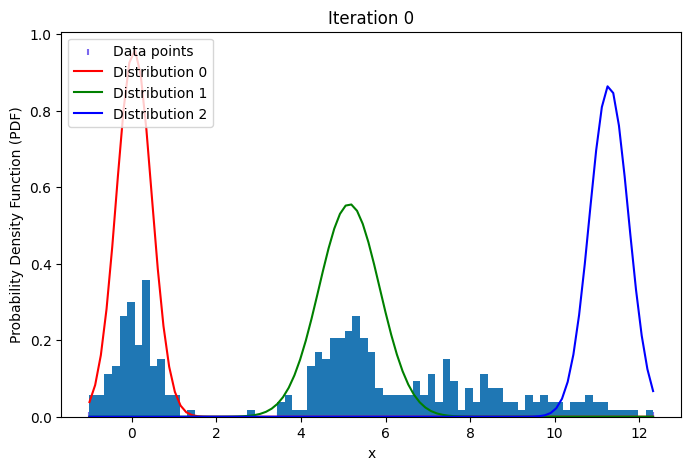

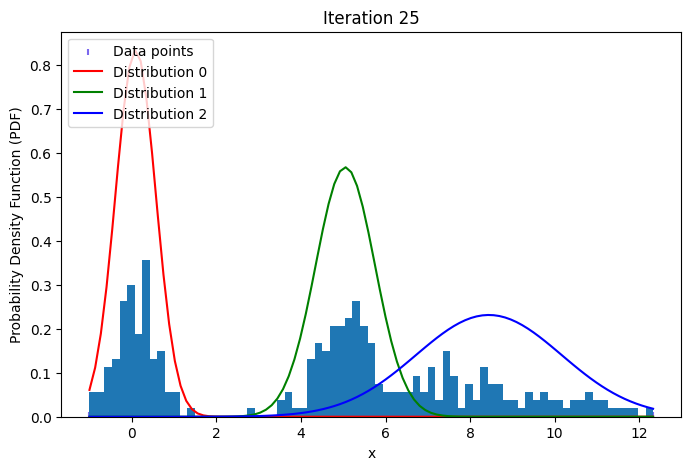

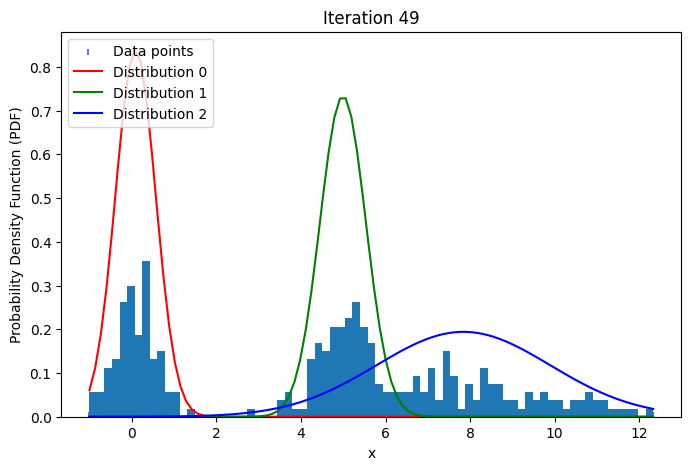

In [153]:
X1=np.random.normal(5,np.sqrt(0.5),100)
X2=np.random.normal(0.1,np.sqrt(0.2),100)
X3=np.random.normal(8,np.sqrt(3),100)
X=np.array(list(X1)+list(X2)+list(X3))
em=gauss.GaussianEM(X,3,[])
gauss.PlotGMM(X,em,25,[],[])

## Using Mahalanobis Distance to set the threshold

In [64]:
from scipy.spatial import distance

#### Example

In [65]:
s = np.array([[20],[123],[113],[103],[123]])

covar = np.cov(s, rowvar=0,ddof=0)

invcovar = np.linalg.inv(covar.reshape((1,1)))
print(invcovar)
for i in range(len(s)-1):
    dis= distance.mahalanobis(s[i], s[i+1], invcovar)
    print(dis)

zscore_s=(s[0]-s[1])/np.std(s)
print(abs(zscore_s))

[[0.0006604]]
2.646914222786511
0.25698196337733115
0.25698196337733115
0.5139639267546623
[2.64691422]


In [7]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

In [69]:
for k in range(len(D_lastiter)):
    inv_var=np.linalg.inv(D_lastiter[k]['Variance'].reshape(1,1))

    for i in range (len(D)-1):
        dis= distance.mahalanobis([D[i]], [D[i+1]], inv_var)
        print(dis)


0.7023789750113691
0.30408972839214304
0.7974134112307356
1.9164816904692794
1.9531175157434948
0.11113289269930855
0.23148003283999882
2.5237423888454584
1.3496734397777497
0.016463827301802077
0.6425505833125331
1.2246616234883598
1.4300545275117789
2.7742461928568445
2.0083234641967675
1.4074560237300553
0.3453977293727769
0.7854157695723623
0.869721241441035
0.5024962032948468
1.7115007694870275
1.1530437487442677
1.419362411851862
1.293999597838298
0.16412776672564325
1.3735741386090696
0.3342127984442544
1.3101503356625612
1.9472503132626524
3.3299606439405034
2.4203040793172708
1.16613964268755
0.850576782756736
2.4383473384085748
1.541706444773335
0.7206640738522215
0.6339021849627209
0.07614835392339081
0.2596597278000315
0.5980123869460572
2.1864265222651578
2.461373904267054
0.7512651578207218
0.4791335549370183
0.3601110193607053
0.5186879874338775
1.2887275924401977
1.7288387625443473
0.6589624651036732
0.665508336661341
3.086622929348401
0.0467111267348728
1.7315220656214

### Using z-score

In [153]:

def findThres(X,n_components,iteration_data):

    X_lastiter=iteration_data[-1]
    thresholds=[]

    for k in range(n_components-1):
        X_space=np.linspace(min(X),max(X),100)
        zscore_1=list()
        zscore_2=list()
        for i in range(len(X_space)):
            zscore_1.append((X_space[i]-X_lastiter[k]['Mean'])/(np.sqrt(X_lastiter[k]['Variance'])))
            zscore_2.append((X_space[i]-X_lastiter[k+1]['Mean'])/(np.sqrt(X_lastiter[k+1]['Variance'])))
            
            def area_left(zscore):
                return norm.cdf(zscore)
            def area_right(zscore):
                return 1-norm.cdf(zscore)

            area_gaussone = area_right(zscore_1)
            area_gausstwo = area_left(zscore_2)

            thres = X_space[np.argmin(area_gaussone+area_gausstwo)]
        thresholds.append(thres)
    return(thresholds)
    
findThres(D,4,gauss.GaussianEM(D,4,[]))

[1.2913232325552273, 3.6668851421587663, 5.934466964962144]

In [41]:
z1=np.abs(t[1])
z2=np.abs(t[2])
list(set(z1).intersection(z2))
# There is no point where z1=z2

[]